In [96]:
import numpy as np
import matplotlib as m
import matplotlib.pyplot as plt
import nltk as n
import re as re
import pandas as pd
import seaborn as sns
import unicodedata 
%matplotlib inline



## Set up 
Here we turn the block of text into a dataframe with a row for each individual message


In [102]:
# Read the chat file
chat = open("Desktop/chat.txt", encoding="utf-8-sig")
chat_text = chat.read()
chat.close()



In [105]:
chat_text = unicodedata.normalize("NFKD", chat_text)

In [106]:
chat_text[:1000]

"7/22/16, 6:47:12 PM: \u200e\u202a+1 (215) 941‐2128\u202c created group “We need a good name”\n7/22/16, 6:47:12 PM: \u200e\u202a+1 (215) 941‐2128\u202c added you\n7/22/16, 6:47:20 PM: \u202a+1 (215) 941‐2128\u202c: Hi everyone 🙌🙌🙌\n7/22/16, 6:55:06 PM: Elizabeth Stone: Lili/Isabel - what was your gut reaction? Do you think we should go for it?\n7/22/16, 6:57:31 PM: Isabel Lachenauer: I didn't see it. I arrived at the pub 10 mins late bc I am a slow walker and by then lili and the landlord had gone\n7/22/16, 6:57:41 PM: Isabel Lachenauer: But the neighborhood is CUTE AF\n7/22/16, 6:57:49 PM: Isabel Lachenauer: and EXCELLENT COFFEE is nearby\n7/22/16, 6:58:16 PM: Isabel Lachenauer: It's super centrally located and yet not too noisy. V residential but still pubs around\n7/22/16, 6:58:26 PM: Isabel Lachenauer: Idk where the nearest grocery store is though\n7/22/16, 6:58:45 PM: Elizabeth Stone: Hahaha i am glad the neighborhood is cute!! You and liam should go to the residents bbq on saturd

In [107]:
print(chat_text[:1000])

7/22/16, 6:47:12 PM: ‎‪+1 (215) 941‐2128‬ created group “We need a good name”
7/22/16, 6:47:12 PM: ‎‪+1 (215) 941‐2128‬ added you
7/22/16, 6:47:20 PM: ‪+1 (215) 941‐2128‬: Hi everyone 🙌🙌🙌
7/22/16, 6:55:06 PM: Elizabeth Stone: Lili/Isabel - what was your gut reaction? Do you think we should go for it?
7/22/16, 6:57:31 PM: Isabel Lachenauer: I didn't see it. I arrived at the pub 10 mins late bc I am a slow walker and by then lili and the landlord had gone
7/22/16, 6:57:41 PM: Isabel Lachenauer: But the neighborhood is CUTE AF
7/22/16, 6:57:49 PM: Isabel Lachenauer: and EXCELLENT COFFEE is nearby
7/22/16, 6:58:16 PM: Isabel Lachenauer: It's super centrally located and yet not too noisy. V residential but still pubs around
7/22/16, 6:58:26 PM: Isabel Lachenauer: Idk where the nearest grocery store is though
7/22/16, 6:58:45 PM: Elizabeth Stone: Hahaha i am glad the neighborhood is cute!! You and liam should go to the residents bbq on saturday and check the other residents out 😉
7/22/16, 6:

In [108]:
tmp = chat_text.split("\n")

In [109]:
tmp[:4]

['7/22/16, 6:47:12 PM: \u200e\u202a+1 (215) 941‐2128\u202c created group “We need a good name”',
 '7/22/16, 6:47:12 PM: \u200e\u202a+1 (215) 941‐2128\u202c added you',
 '7/22/16, 6:47:20 PM: \u202a+1 (215) 941‐2128\u202c: Hi everyone 🙌🙌🙌',
 '7/22/16, 6:55:06 PM: Elizabeth Stone: Lili/Isabel - what was your gut reaction? Do you think we should go for it?']

In [110]:
tmp = [s.split(": ") for s in tmp]

In [112]:
len(tmp)

45519

In [113]:
tmp = [x for x in tmp if len(x) == 3]

In [114]:
len(tmp)

45009

In [115]:
tmp[:9]

[['7/22/16, 6:47:20 PM', '\u202a+1 (215) 941‐2128\u202c', 'Hi everyone 🙌🙌🙌'],
 ['7/22/16, 6:55:06 PM',
  'Elizabeth Stone',
  'Lili/Isabel - what was your gut reaction? Do you think we should go for it?'],
 ['7/22/16, 6:57:31 PM',
  'Isabel Lachenauer',
  "I didn't see it. I arrived at the pub 10 mins late bc I am a slow walker and by then lili and the landlord had gone"],
 ['7/22/16, 6:57:41 PM',
  'Isabel Lachenauer',
  'But the neighborhood is CUTE AF'],
 ['7/22/16, 6:57:49 PM',
  'Isabel Lachenauer',
  'and EXCELLENT COFFEE is nearby'],
 ['7/22/16, 6:58:16 PM',
  'Isabel Lachenauer',
  "It's super centrally located and yet not too noisy. V residential but still pubs around"],
 ['7/22/16, 6:58:26 PM',
  'Isabel Lachenauer',
  'Idk where the nearest grocery store is though'],
 ['7/22/16, 6:58:45 PM',
  'Elizabeth Stone',
  'Hahaha i am glad the neighborhood is cute!! You and liam should go to the residents bbq on saturday and check the other residents out 😉'],
 ['7/22/16, 6:58:55 PM'

In [116]:
df = pd.DataFrame.from_records(tmp)

In [117]:
df.head()

,0,1,2
0,"7/22/16, 6:47:20 PM",‪+1 (215) 941‐2128‬,Hi everyone 🙌🙌🙌
1,"7/22/16, 6:55:06 PM",Elizabeth Stone,Lili/Isabel - what was your gut reaction? Do y...
2,"7/22/16, 6:57:31 PM",Isabel Lachenauer,I didn't see it. I arrived at the pub 10 mins ...
3,"7/22/16, 6:57:41 PM",Isabel Lachenauer,But the neighborhood is CUTE AF
4,"7/22/16, 6:57:49 PM",Isabel Lachenauer,and EXCELLENT COFFEE is nearby


In [118]:
df[1].unique()

array(['\u202a+1 (215) 941‐2128\u202c', 'Elizabeth Stone',
       'Isabel Lachenauer', 'Liam Kirwin', 'Robert', 'Debbie Blair'],
      dtype=object)

In [76]:
# test
strings = re.findall('(\d+\/\d+\/\d+),\s(\d+:\d+:\d+)\s(\w+):(.*):(.*)', chat_text)

In [38]:
# Feed the file text into findall(); it returns a list of all the found strings
strings = re.findall('(\d+\/\d+\/\d+),\s(\d+:\d+:\d+)\s(\w+):(\s\w+\s*\w+)*:(.*)', chat_text)


In [66]:
# Turn the strings into a dataframe
msgs = pd.DataFrame(strings,columns =['date','time','am_pm','sender','message'])




## Detailed cleaning

This stage involves various bits of cleaning that we will need to do in order to: 

1. Have multiple messages sent by the same individual show up as the same message (conditional on them having the same type) 


In [67]:
msgs[msgs['message'].str.startswith(' lol no  i think lent is dumb')]
msgs[msgs['message'].str.contains('i think lent')]

,date,time,am_pm,sender,message
21687,2/28/17,2:17:43,PM,Isabel Lachenauer,i think lent is dumb


In [68]:
msgs[13005:13200]

,date,time,am_pm,sender,message
13005,12/22/16,6:42:54,PM,‪+1 (215) 941‑2128‬,YOU SO GREAT
13006,12/22/16,6:42:59,PM,‪+1 (215) 941‑2128‬,GLAD THEY SENT IT
13007,12/22/16,6:43:07,PM,‪+1 (215) 941‑2128‬,TOTALLY HERE TO CHAT RE IT
13008,12/22/16,6:43:14,PM,‪+1 (215) 941‑2128‬,BUT PROB TOMORROW
13009,12/22/16,6:43:22,PM,‪+1 (215) 941‑2128‬,AS. O BATTERU AND AM
13010,12/22/16,6:43:25,PM,‪+1 (215) 941‑2128‬,AS NO
13011,12/22/16,6:47:41,PM,Isabel Lachenauer,...did anyone understand that? Because I didn't.
13012,12/22/16,6:47:53,PM,Isabel Lachenauer,#DebsGoneWild
13013,12/22/16,6:53:50,PM,Elizabeth Stone,Will he be there tonight???
13014,12/22/16,6:53:58,PM,‪+1 (215) 941‑2128‬,No I just left him


In [69]:
msgs.sender.unique()

array([' \u202a+1\xa0(215)\xa0941‑2128\u202c', ' Elizabeth Stone',
       ' Isabel Lachenauer', ' Liam Kirwin',
       ' \u202a+1\xa0(215)\xa0941‑2128\u202c: 5th wheel for life ',
       ' \u202a+1\xa0(215)\xa0941‑2128\u202c: I still have not even been :( ',
       ' Robert',
       ' \u202a+1\xa0(215)\xa0941‑2128\u202c: another great thing about canadians ',
       ' \u202a+1\xa0(215)\xa0941‑2128\u202c: ', ' Robert: Follow on',
       " Elizabeth Stone: I'm going to be away from internet for a couple of hours but re",
       ' \u202a+1\xa0(215)\xa0941‑2128\u202c: question ',
       ' \u202a+1\xa0(215)\xa0941‑2128\u202c: Oh Isabel ',
       " \u202a+1\xa0(215)\xa0941‑2128\u202c: There's a really good podcast called seriously from bbc radio4. I just binge listened to all the back episodes - one with Roald Dahl right now is awesome ",
       ' \u202a+1\xa0(215)\xa0941‑2128\u202c: I know very little cos she gets headaches when texting so I just got one big message from her yesterday reall

In [32]:
msgs[["lol no" in msg for msg in msgs.message]]

,date,time,am_pm,sender,message,msg_length
sender_group,,,,,,
2441,11/20/16,10:27:27,PM,Isabel Lachenauer,"It is an amazing secret HILARIOUS, my mom wa...",349
4764,2/24/17,8:52:49,PM,Isabel Lachenauer,Never mind I DO make rob do that But he does...,256
4826,2/28/17,2:17:40,PM,Isabel Lachenauer,lol no i think lent is dumb i also get anno...,3007
10217,6/2/17,5:44:52,PM,Debbie Blair,lol no i dont know ur schedule,31
12918,7/10/17,10:01:24,PM,Debbie Blair,Well we don't know that for sure about other ...,465
15455,8/24/17,10:59:11,AM,Debbie Blair,lol no he made a programme that can look at ...,103


In [35]:
msgs[msgs.message.str.find("lol no") > 0]

,date,time,am_pm,sender,message,msg_length
sender_group,,,,,,
2441,11/20/16,10:27:27,PM,Isabel Lachenauer,"It is an amazing secret HILARIOUS, my mom wa...",349
4764,2/24/17,8:52:49,PM,Isabel Lachenauer,Never mind I DO make rob do that But he does...,256
4826,2/28/17,2:17:40,PM,Isabel Lachenauer,lol no i think lent is dumb i also get anno...,3007
10217,6/2/17,5:44:52,PM,Debbie Blair,lol no i dont know ur schedule,31
12918,7/10/17,10:01:24,PM,Debbie Blair,Well we don't know that for sure about other ...,465
15455,8/24/17,10:59:11,AM,Debbie Blair,lol no he made a programme that can look at ...,103


In [6]:
# Create a variable that counts unique person messages - ie it adds one everytime someone new puts in a message
# I could run this as a function. Basic idea: 
# If sender[-1]!=sender[0] then count[0]=count[-1]+1

# Create a count vector
results = [1]
count = 1
for i in range(1,len(msgs.index)): 
    if msgs["sender"].iloc[i] == msgs["sender"].iloc[i-1]:   # Note single [] give you series while [[]] output a dataframe
        results.append(count)
    else: 
        count += 1
        results.append(count)

        
# Join this vector onto the dataframe 
msgs['sender_group'] = results

# Check results 
#msgs.iloc[0:100]

In [7]:
# Create a dataframe with just the text row and person name 
msgs_sm = msgs[['sender','sender_group',"message"]]

# Combine the text from these on a row by row basis
msgs_sm_test = [' '.join(d[1]) for d in msgs_sm.groupby(['sender_group'])['message']]

# Show results 
msgs_sm_test[4]

" Looks like there's a big tesco a 20 mins walk away and a big lidl 15 mins walk away and lots of small ones close by  Which is pretty similar to the boys' flat in brixton atm  Also, deposit is 6 months rent ie £15600? That's fine but is quite a bit more than is standard"

In [8]:
# Create a new dataset that is just done by the aggregated messages 
msgs_grp = msgs.groupby('sender_group').first()

# Replace message with the combined message
msgs_grp['message'] = msgs_sm_test

# Check 
print(msgs_grp['message'].iloc[4])
print(msgs['message'].iloc[8])

 Looks like there's a big tesco a 20 mins walk away and a big lidl 15 mins walk away and lots of small ones close by  Which is pretty similar to the boys' flat in brixton atm  Also, deposit is 6 months rent ie £15600? That's fine but is quite a bit more than is standard
 Looks like there's a big tesco a 20 mins walk away and a big lidl 15 mins walk away and lots of small ones close by


## Basic plots

Here we want to show things like:
1.How many messages people sent 
2.How long were people's average message
3.Density plot of message length 


In [9]:
# Create message length variable
msgs = msgs_grp
msgs['msg_length'] = msgs['message'].apply(len)


In [10]:
# Create a summary table 
agg_dict = {
    "msg_length": ["mean","sum"], 
    "message":"count"
    }

su = msgs.groupby('sender').agg(agg_dict)
print(su)

                   msg_length         message
                         mean     sum   count
sender                                       
 Debbie Blair       79.882150  300277    3759
 Elizabeth Stone    79.721933  336586    4222
 Isabel Lachenauer  64.759178  192270    2969
 Liam Kirwin        62.363369  127346    2042
 Robert             65.055887  174610    2684


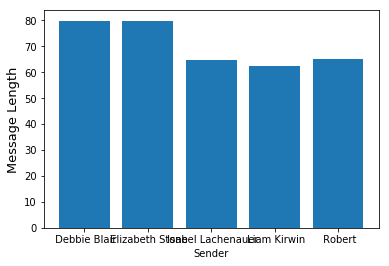

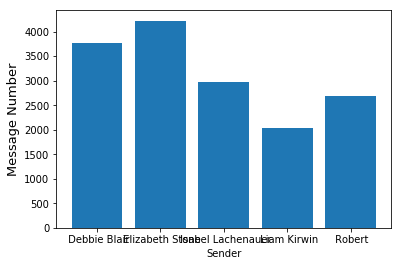

In [11]:

# Plot the length of messages people sent 
fig, ax = plt.subplots()
ax.bar(x = su.index, height = su.msg_length["mean"])
plt.ylabel('Message Length', fontsize=13)
plt.xlabel('Sender', fontsize=10)
plt.show()

# Plot the number of messages people sent 
fig, ax = plt.subplots()
ax.bar(x = su.index, height = su.message["count"])
plt.ylabel('Message Number', fontsize=13)
plt.xlabel('Sender', fontsize=10)
plt.show()



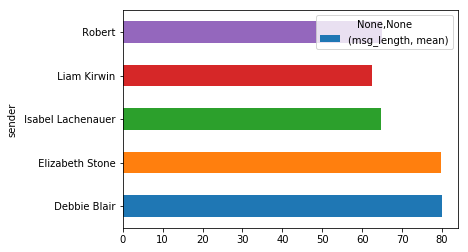

In [12]:
su.plot.barh(y = ("msg_length", "mean"))

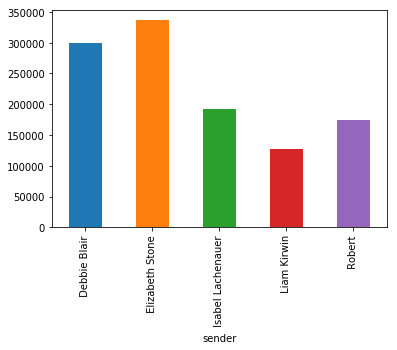

In [13]:
for col in su:
    su[col].plot.bar()

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


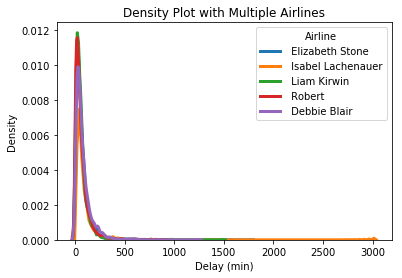

In [14]:
# Density plot of message length

# Iterate through the five airlines
for sender in msgs["sender"].unique():
    
    # Subset to the airline
    subset = msgs[msgs['sender'] == sender]
    
    # Draw the density plot
    sns.distplot(subset['msg_length'], hist = False, kde = True,
                 kde_kws = {'linewidth': 3},
                 label = sender)
    
# Plot formatting
plt.legend(prop={'size': 10}, title = 'Airline')
plt.title('Density Plot with Multiple Airlines')
plt.xlabel('Delay (min)')
plt.ylabel('Density')
plt.show()

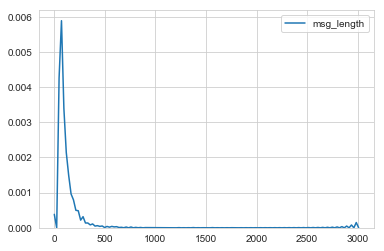

In [15]:
sns.set_style('whitegrid')
sns.kdeplot(msgs["msg_length"], bw=0.5)

In [17]:
msgs.head()

,date,time,am_pm,sender,message,msg_length
sender_group,,,,,,
1,7/22/16,6:55:06,PM,Elizabeth Stone,Lili/Isabel - what was your gut reaction? Do ...,76
2,7/22/16,6:57:31,PM,Isabel Lachenauer,I didn't see it. I arrived at the pub 10 mins...,317
3,7/22/16,6:58:45,PM,Elizabeth Stone,Hahaha i am glad the neighborhood is cute!! Y...,136
4,7/22/16,6:58:55,PM,Isabel Lachenauer,HA,3
5,7/22/16,7:01:37,PM,Elizabeth Stone,Looks like there's a big tesco a 20 mins walk...,270


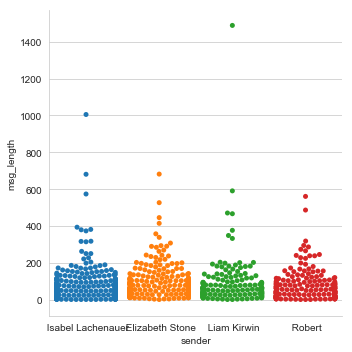

In [19]:
sns.catplot(x = "sender", y = "msg_length", kind = "swarm", data = msgs[1:1000])

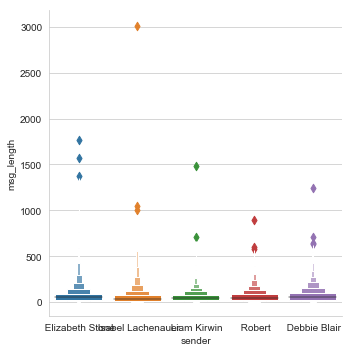

In [22]:
sns.catplot(x = "sender", y = "msg_length", kind = "boxen", data = msgs)

In [25]:
msgs[msgs['msg_length']>2000].message.values

array([' lol no  i think lent is dumb  i also get annoyed when non catholics do it  like guys, it’s not even a thing you believe in, just make a normal resolution to stop doing something and get on with it  i also hate the rhetoric of punishment and abstinence that’s all tied up in lent  i think it’s really unhealthy  (i have strong feelings)  i’m also really well slept so i have ALL THE FEELINGS  went to bed at 9:40 it was amazing  bounced out of bed at 6:15 like COME AT ME, TUESDAY  i have my night class tho, so i’ll probably regret my enthusiasm  but yeah no lent  it kind of annoys me in the same way people are like “oh, im gonna try ramadan” like HELLOO, NO  if you wanna not eat from sunup to sundown out of curiosity, by all means, knock yourself out  but don’t call it ramadan  Irishness is a religion for Debs  ❤  i respect that  st paddys day always annoyed me in elementary school because i was LITERALLY the only non irish person in my school  well, me and my sister  :P  lol  iris

In [ ]:
# Create columns for each person
tmp = msgs[["sender"],["message_"]]


# Boxplot of message length
fig, ax = plt.subplots()
ax.boxplot(x = msgs["sender"].unique(), height = su.message["count"])
plt.ylabel('Message Number', fontsize=13)
plt.xlabel('Sender', fontsize=10)
plt.show()

## Create a matrix  of who replies to whom



## Helper functions
These are just functions I'm learning about while exploring Python


In [225]:
%who


chat	 chat_text	 count	 date_time	 ding	 i	 m	 media_pattern	 msgs	 
msgs_grp	 msgs_sm	 msgs_sm_test	 n	 np	 pd	 re	 re_date	 re_media	 
re_test	 results	 senders	 sm_msgs	 strings	 test	 vec	 


In [66]:
dir(chat)
type(chat)


_io.TextIOWrapper

In [139]:
dir(sm_msgs)

['T',
 '_AXIS_ALIASES',
 '_AXIS_IALIASES',
 '_AXIS_LEN',
 '_AXIS_NAMES',
 '_AXIS_NUMBERS',
 '_AXIS_ORDERS',
 '_AXIS_REVERSED',
 '_AXIS_SLICEMAP',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_wrap__',
 '__bool__',
 '__bytes__',
 '__class__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__div__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',
 '__rand__',
 '__rdiv__',
 '__reduce__',
 '__reduce_ex__',
 '__

In [141]:
len(sm_msgs.index)

99